# NAILDOH Subset

This is the first notebook in the series used to prepare and analyze the NALDOH collection.

## Resources

In [3]:
# Libraries
library(tidyverse) # for data manipulation

In [4]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

In [5]:
# Data
docData <- factorize(read.csv("IMLD_DOCS_QA completed.csv")) # Put csv into a dataframe called docData

# Variabe Names
colnames(docData) # Get an overview of the dataframe

[1] "docsequence"               "docid"                    
 [3] "sourceid"                  "docauthorid"              
 [5] "doctitle"                  "docyear"                  
 [7] "docmonth"                  "docday"                   
 [9] "docpage"                   "doctype"                  
[11] "docabbr"                   "allsubject"               
[13] "subjname"                  "organization"             
[15] "titlesubj"                 "topicsubj"                
[17] "broadsubj"                 "geographic"               
[19] "historical"                "personalevent"            
[21] "agewriting"                "publisher"                
[23] "sourcetitle"               "editor"                   
[25] "sourcemedium"              "language"                 
[27] "pubyear"                   "pubplace"                 
[29] "journal"                   "jcitation"                
[31] "spages"                    "ecitation"                
[33] "mslocation"                "sourcetype"               
[35] "docauthorname"             "allauthorforms"           
[37] "briefname"                 "authrace"                 
[39] "religion"                  "nationality"              
[41] "birthyear"                 "birthmonth"               
[43] "birthday"                  "deathyear"                
[45] "deathmonth"                "deathday"                 
[47] "birthplace"                "deathplace"               
[49] "scopyright"                "aspcopyright"             
[51] "mscopyright"               "schoolattend"             
[53] "educlevel"                 "audience"                 
[55] "authorgender"              "native_occupation"        
[57] "north_american_occupation" "organization_affiliations"
[59] "year_immigration"          "cultural_heritage"        
[61] "point_of_entry"            "point_of_departure"       
[63] "stayed_north_america"      "author_generation"        
[65] "image_filename"            "thumbnail_filename"       
[67] "display_thumbnail"         "wwritten"                 
[69] "wsent"                     "marriagestatus"           
[71] "maternalstatus"

## Subset

In [6]:
letters <- docData %>% #put docData into dataframe
filter(doctype == "Letter") %>% # Decision 1
filter(language == "English") %>% # Decision 2
filter(is.na(docyear) | docyear < 1914) %>% # Decision 3
filter(grepl("United States", wwritten) | 
       grepl("Canada", wwritten)) # Decision 4

sum(nrow(letters))

[1] 986

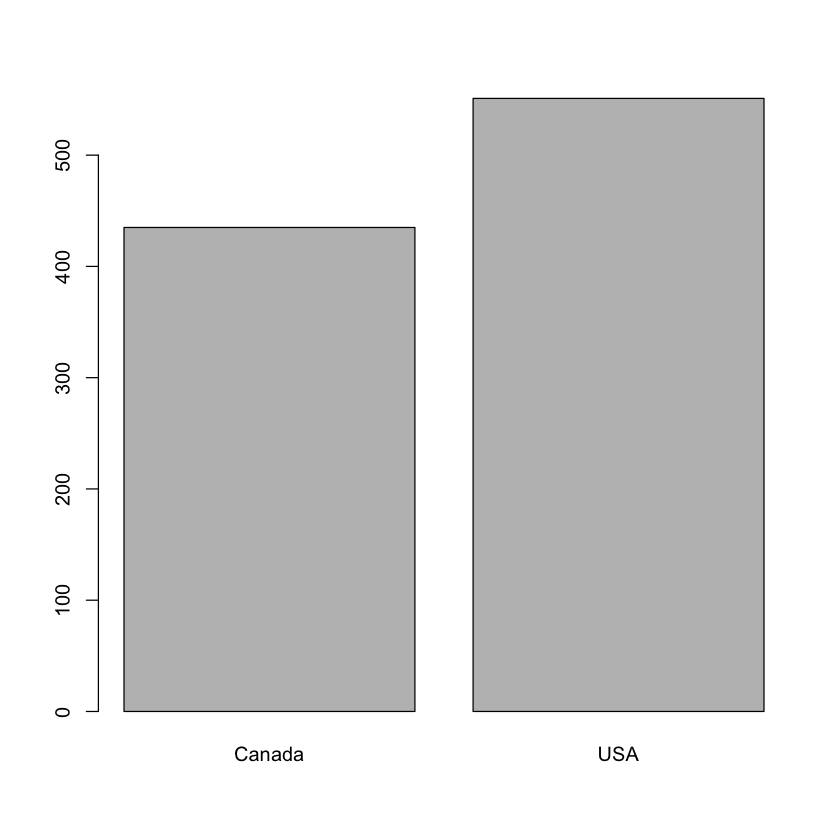

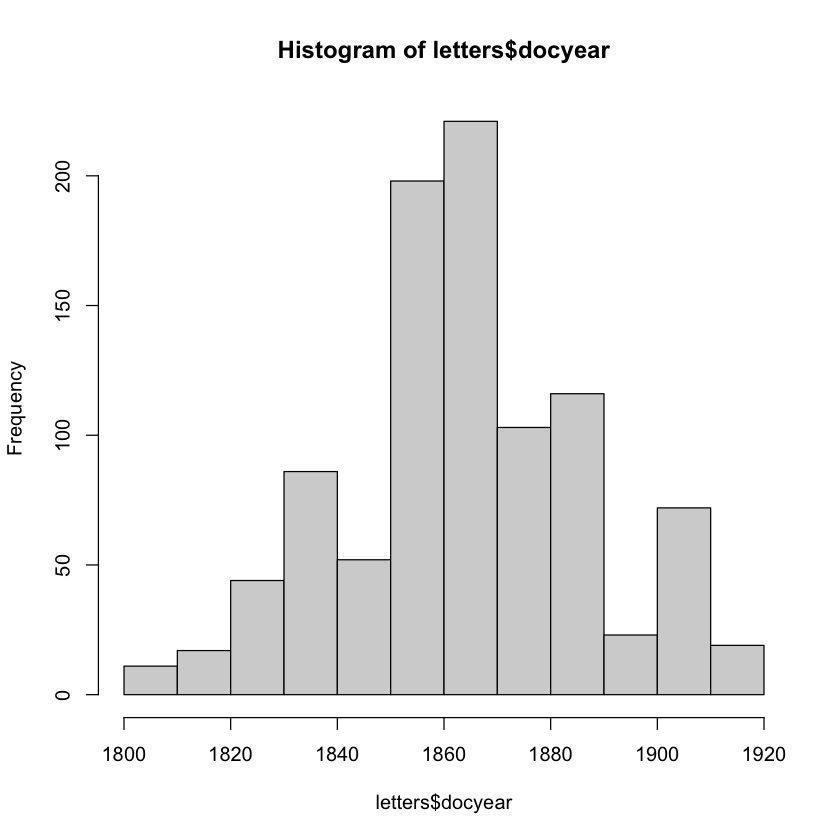

In [7]:
# New variable for author location
letters$authorLocation <- as.character(letters$wwritten)

#Recode Canada
rows = which(grepl('Canada', letters$authorLocation)) # Get rows that meet condition
letters$authorLocation[rows] <- "Canada" # Recode data

#Recode United States
rows = which(grepl('United States', letters$authorLocation)) # Get rows that meet condition
letters$authorLocation[rows] <- "USA" # Recode data

# Convert character vars to factor
letters$authorLocation <- as.factor(letters$authorLocation)

#Check counts

plot(letters$authorLocation)
hist(letters$docyear)

In [8]:
table(letters$authorLocation)


Canada    USA 
   435    551 

## Save subset

In [12]:
write.csv(letters, 
          "20240314a_PhD_NaildohSubset.csv", 
          row.names=FALSE)

In [10]:
glimpse(letters)

Rows: 986
Columns: 72
$ docsequence               <int> 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ docid                     <fct> S1019-D002, S1019-D004, S1019-D005, S1019-D0…
$ sourceid                  <fct> S1019, S1019, S1019, S1019, S1019, S1019, S1…
$ docauthorid               <fct> per0001043, per0001043, per0001043, per00010…
$ doctitle                  <fct> "Letter from Sister Blandina Segale to Siste…
$ docyear                   <int> 1872, 1872, 1872, 1872, 1873, 1873, 1873, 18…
$ docmonth                  <int> 11, 12, 12, 12, 3, 7, 9, 6, 11, 6, 9, 12, 1,…
$ docday                    <int> 30, 6, 10, 21, 1, NA, NA, 30, 14, NA, NA, 16…
$ docpage                   <fct> "3-10", "13-22", "22-29", "29-37", "37-44", …
$ doctype                   <fct> Letter, Letter, Letter, Letter, Letter, Lett…
$ docabbr                   <fct> S1019-D002, S1019-D004, S1019-D005, S1019-D0…
$ allsubject                <fct> "Clergy; Missionaries; Students; Travel; Rel…
$ subjname        